# Simple MLP model
A simple MLP contains only one hidden layer. We supply a data matrix to the input to have the same input as for the transformers. So we first need to flatten the matrix into a vector that can be run through the net.

This notebook presents the results achieved using the multi-step forecasting model.

In [1]:
import inference_helpers

import torch
from config import get_config

import numpy as np
from sklearn.metrics import mean_squared_error

In [4]:
from importlib import reload
reload(inference_helpers)

<module 'inference_helpers' from 'c:\\Users\\obhlivoj\\DP\\System-Imbalance-Forecasting\\models\\ML\\inference_helpers.py'>

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
cfg = get_config()

Using device: cuda


We present summary statistics on validation data. To measure error, it was used RMSE, MAE and R2 score. The error is computed for every prediction separately.

In [3]:
params = ('hidden_dim', 'dropout')

In [5]:
best_metrics, best_models_inds, data_dict = inference_helpers.get_best_model(cfg, './loss/runforward_')
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'forward_', params, best_models_inds, eval_data="val")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 152.58it/s]

--------------------


MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 259.98it/s]

--------------------


MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 209.51it/s]

--------------------


MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 305.16it/s]

--------------------


MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 264.86it/s]

--------------------


MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 206.43it/s]

--------------------


MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 219.38it/s]

--------------------


MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 215.86it/s]

--------------------
Time-step	Error
1		13399.33
2		19111.84
3		22142.19
4		23385.15
5		25504.27
6		26354.67
7		27205.94
8		27290.72


In [6]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAE	R2
1	115.76	86.56	0.56
2	138.25	102.53	0.37
3	148.80	109.26	0.27
4	152.92	111.97	0.23
5	159.70	116.31	0.16
6	162.34	118.45	0.13
7	164.94	120.47	0.10
8	165.20	120.34	0.10


In [7]:
loss_validation, loss_cat, preds_gt = inference_helpers.validate_n_models(device, 'forward_', best_models_inds, eval_data="test")

MODEL EVAL - #1
--------------------


100%|██████████| 14/14 [00:00<00:00, 197.71it/s]

--------------------


MODEL EVAL - #2
--------------------


100%|██████████| 14/14 [00:00<00:00, 260.09it/s]

--------------------


MODEL EVAL - #3
--------------------


100%|██████████| 14/14 [00:00<00:00, 259.62it/s]

--------------------


MODEL EVAL - #4
--------------------


100%|██████████| 14/14 [00:00<00:00, 246.27it/s]

--------------------


MODEL EVAL - #5
--------------------


100%|██████████| 14/14 [00:00<00:00, 250.67it/s]

--------------------


MODEL EVAL - #6
--------------------


100%|██████████| 14/14 [00:00<00:00, 206.35it/s]

--------------------


MODEL EVAL - #7
--------------------


100%|██████████| 14/14 [00:00<00:00, 159.52it/s]

--------------------


MODEL EVAL - #8
--------------------


100%|██████████| 14/14 [00:00<00:00, 215.96it/s]

--------------------
Time-step	Error
1		11870.11
2		17526.80
3		20427.16
4		21557.06
5		23466.66
6		24172.51
7		24806.71
8		25104.04


In [8]:
res = inference_helpers.compute_val_errors(preds_gt, 8)

Model	RMSE	MAE	R2
1	108.95	80.85	0.56
2	132.39	97.19	0.35
3	142.92	102.78	0.25
4	146.82	105.67	0.20
5	153.19	108.83	0.13
6	155.48	110.70	0.11
7	157.50	112.15	0.08
8	158.44	112.50	0.07


The visual results are shown in the following graphs. Plotted are the k best, worst and random predictions against the average RMSE over all prediction steps.

In [33]:
seq_data = inference_helpers.group_data(preds_gt)

rmse_data = np.empty(len(seq_data), dtype=np.float32)
for ind, dp in enumerate(seq_data):
    rmse_data[ind] = mean_squared_error(dp['true'], dp['pred'], squared=False)

# get k random, best and worst predictions
k = 3
min_loss_inds = np.argsort(rmse_data)[:k].tolist()
max_loss_inds = np.argsort(rmse_data)[-k:].tolist()
rand_inds = np.random.randint(0, len(rmse_data), size=k).tolist()

### Bad predictions

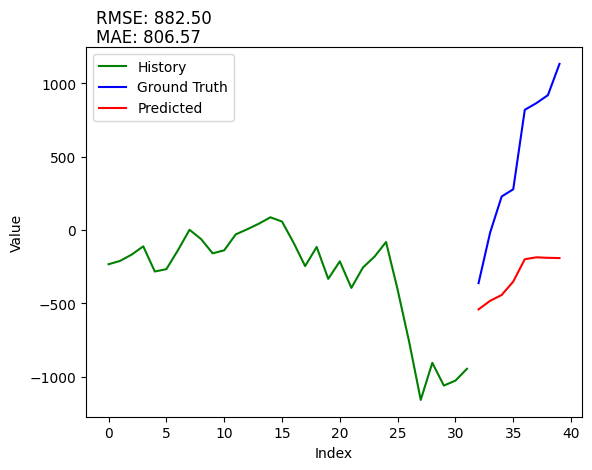

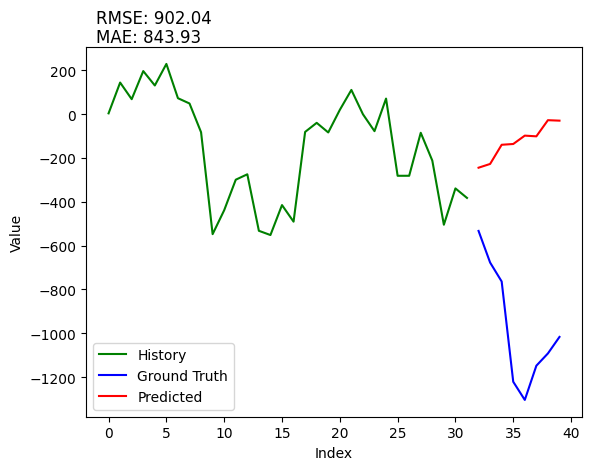

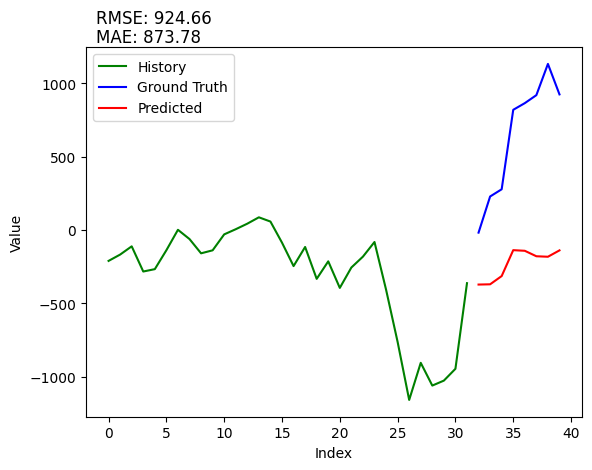

In [34]:
inference_helpers.plot_k_results(seq_data, max_loss_inds)

### Good predictions

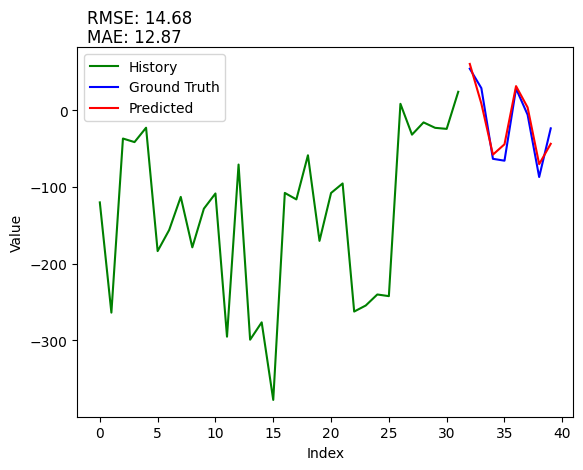

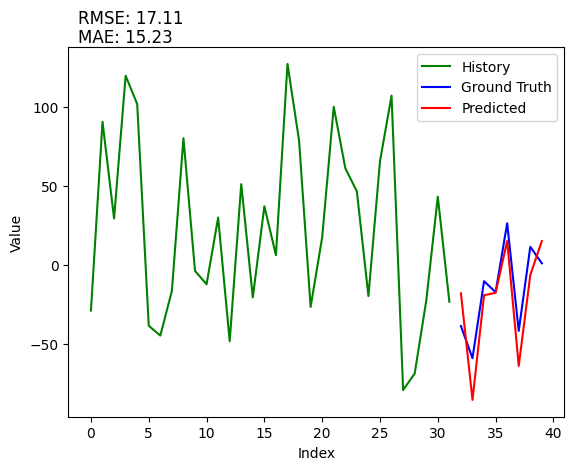

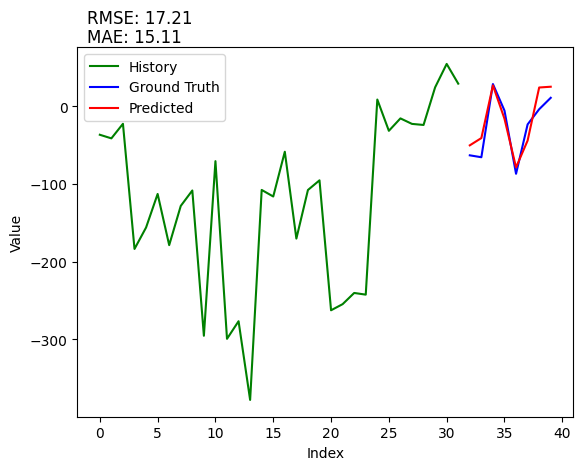

In [35]:
inference_helpers.plot_k_results(seq_data, min_loss_inds)

### Random predictions

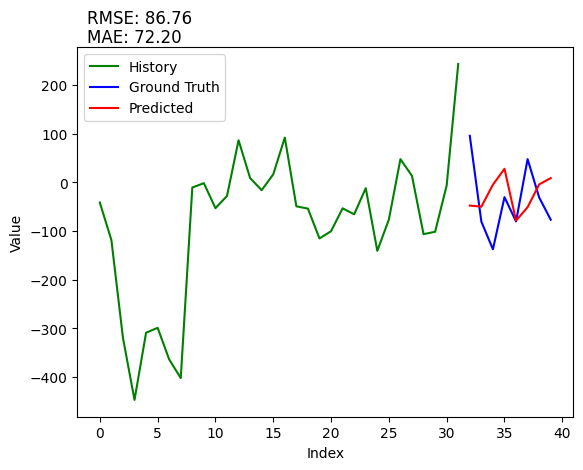

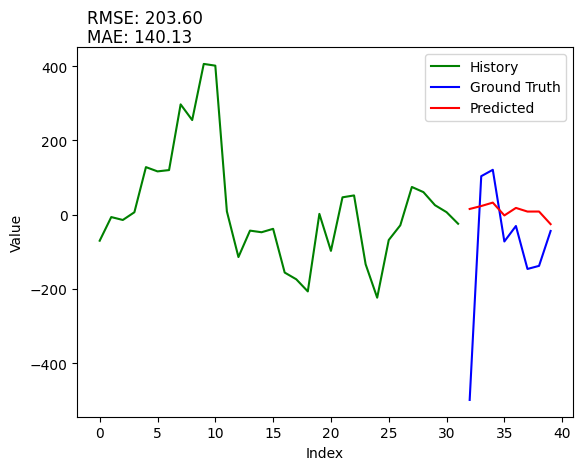

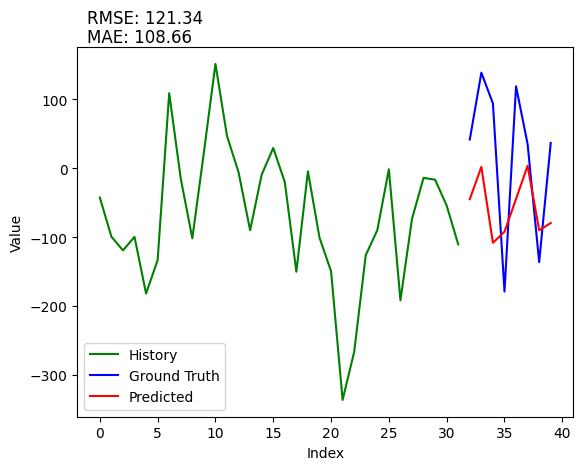

In [36]:
inference_helpers.plot_k_results(seq_data, rand_inds)